This is my first time using KNN classifier so it's going to be fun<br>
The data is availabel in Kaggle.<br>
Here is the link : https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset/version/2

**$Describtion :$**<br>
                  *Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates.Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.*<br>

This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

In [2]:
# Let's import some of the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the dataset
breast_cancer = pd.read_csv(r'F:\DATA SCIENCE\Kaggle Datasets\Breast cancer\Breast_cancer_data.csv')
breast_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
print('The length of the dataset :',breast_cancer.shape[0])

The length of the dataset : 569


In [7]:
# checking whether it has any missing values or not
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [9]:
breast_cancer.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

So, there are no null values.

In [12]:
breast_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


1    357
0    212
Name: diagnosis, dtype: int64


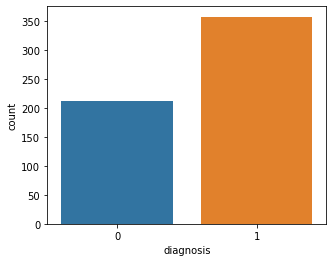

In [24]:
# let's check the distribution of the class (or prediction variable)
# breast_cancer.diagnosis.value_counts().plot(kind = 'bar')
print(breast_cancer.diagnosis.value_counts())
plt.figure(figsize = (5,4))
sns.countplot(x = breast_cancer.diagnosis,data = breast_cancer)
plt.show()

As we can see we have more data points of class 1 compare to class 0

<Figure size 1440x1440 with 0 Axes>

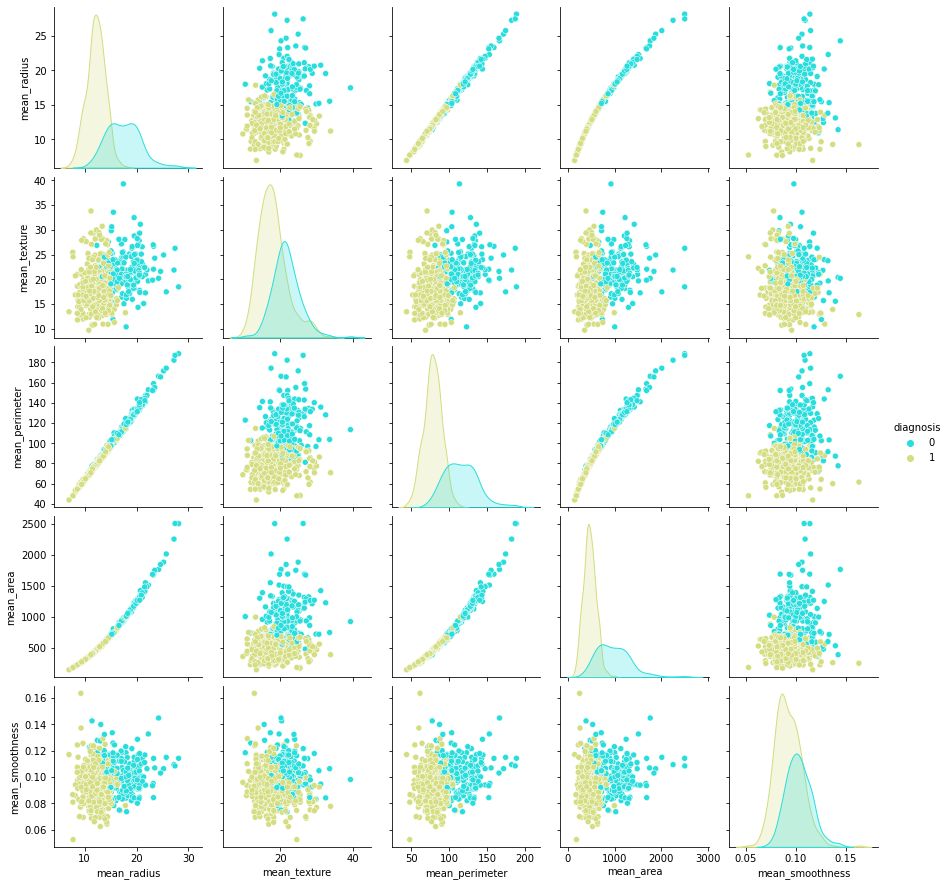

In [29]:
# pair plot
plt.figure(figsize = (20,20))
sns.pairplot(data = breast_cancer, hue = 'diagnosis',palette = 'rainbow')
plt.show()

from the above plot we can see that there are a lot of overlapping between the classes


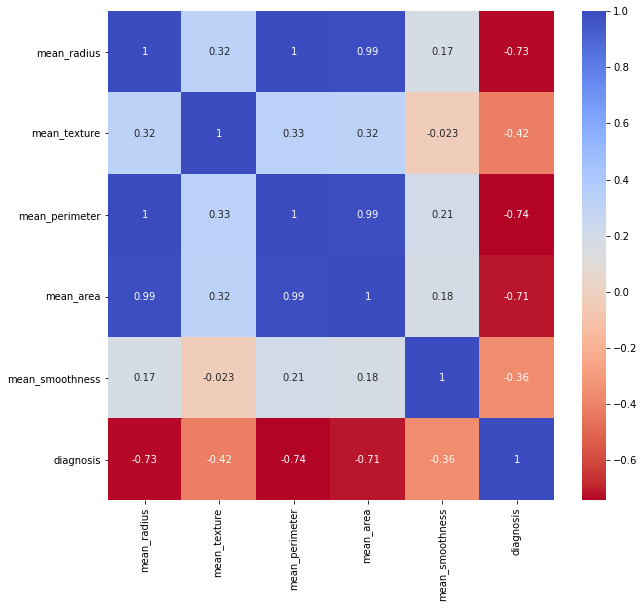

In [177]:
# let's plot a heatmap and check the correlation between the features
plt.figure(figsize = (10,9))
sns.heatmap(breast_cancer.corr(),annot=True,cmap='coolwarm_r')
plt.show()

from the above heatmap we can see that a lot of features have very strong correlations between them.<dr> 

An explanation for this correlation can be found from the above pairplot as these features are directly propertional to each other. 

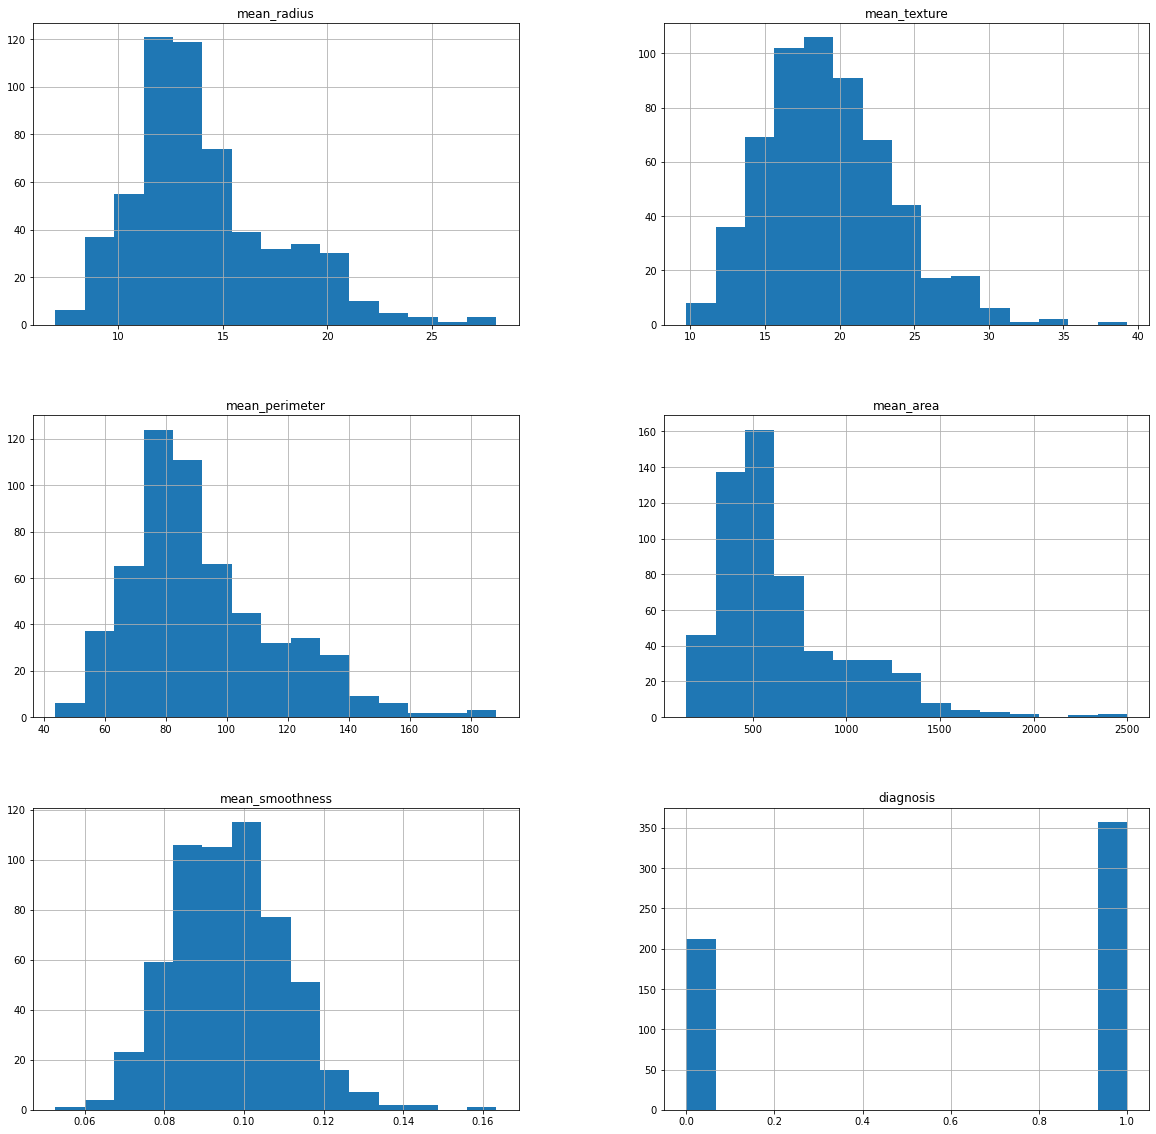

In [49]:
# let's also check the distribution of the data in each column
hist_plot = breast_cancer.hist(figsize = (20,20),bins = 15)

from the above plots we can see that few features have right skewed distribution.<dr>

Also in order to apply the **knn classifier** we need to normalize or standardize the data so that the high values of one feature doesn't affect the distance function of the knn algorithm

In [56]:
breast_cancer.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [166]:
# let's import the standardscaler from the sklearn library
from sklearn.preprocessing import StandardScaler
# let's creat a new df dropping the class/prediction feature
X = breast_cancer[['mean_radius', 
                   'mean_texture', 
                   'mean_perimeter', 
                   'mean_area',
                   'mean_smoothness']]
s_scal = StandardScaler()
X = s_scal.fit_transform(X)
X # The outcome is a numpy ndarray

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633],
       [ 1.82982061, -0.35363241,  1.68595471,  1.90870825, -0.82696245],
       [ 1.57988811,  0.45618695,  1.56650313,  1.55888363,  0.94221044],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578,  0.57795264, -0.84048388],
       [ 1.83834103,  2.33645719,  1.98252415,  1.73521799,  1.52576706],
       [-1.80840125,  1.22179204, -1.81438851, -1.34778924, -3.11208479]])

In [167]:
# we can also convert it to a df
X = pd.DataFrame(X,columns = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness'])
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,1.097064,-2.073335,1.269934,0.984375,1.568466
1,1.829821,-0.353632,1.685955,1.908708,-0.826962
2,1.579888,0.456187,1.566503,1.558884,0.942210
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553
4,1.750297,-1.151816,1.776573,1.826229,0.280372


In [168]:
# label/class series
y = breast_cancer['diagnosis']
y[:4]

0    0
1    0
2    0
3    0
Name: diagnosis, dtype: int64

In [169]:
# let's create training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 10,stratify = y)
# stratify = y for splitting the data in such a way that
# each set contains approximately the same percentage of
# samples of each target class as the complete set

In [170]:
# importing the model
from sklearn.neighbors import KNeighborsClassifier
test_score = []
train_score = []
for i in range(1,30): # for finding the right value of k
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

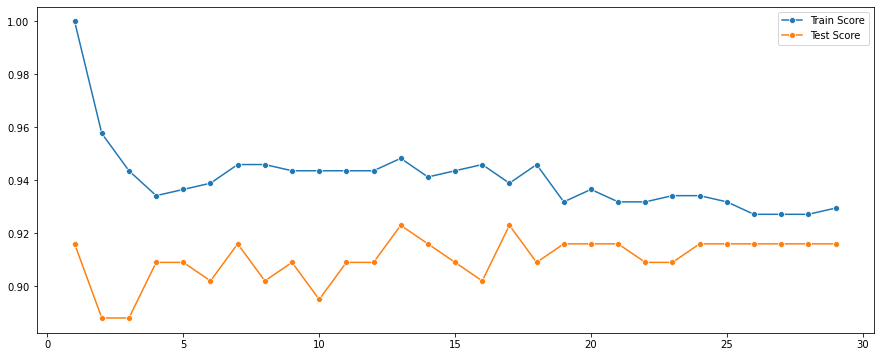

The best score 92.3% is achived at a k value of [12, 16]


In [171]:
# result visualization
plt.figure(figsize=(15,6))
sns.lineplot(range(1,30),train_score,marker='o',label='Train Score')
sns.lineplot(range(1,30),test_score,marker='o',label='Test Score')
plt.show()

# the value of k for the best accuracy score of test set
best_score = max(test_score)
index_of_best = [i for i,v in enumerate(test_score) if v == best_score]
print('The best score {:.3}% is achived at a k value of {}'.format(best_score*100,index_of_best))

so we got a score of .923 at k = 12 and 16

Clssification Report
********************
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        53
           1       0.91      0.97      0.94        90

    accuracy                           0.92       143
   macro avg       0.92      0.90      0.91       143
weighted avg       0.92      0.92      0.91       143

F1 Score =  0.9354838709677419


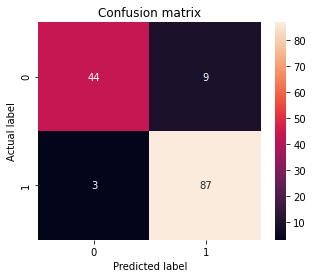

In [108]:
# let's plot confusion matrix and the classification report
from sklearn.metrics import confusion_matrix,classification_report,f1_score
y_pred = knn.predict(x_test)
cnf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,4))
sns.heatmap(pd.DataFrame(cnf_mat), annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print('Clssification Report')
print('*'*20)
print(classification_report(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

F1_score of 0.935 is consider to be very good

<Figure size 864x432 with 0 Axes>

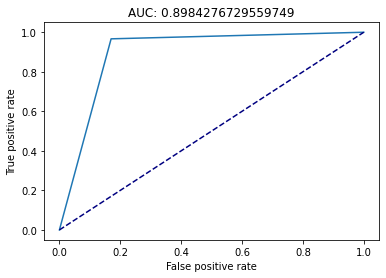

In [107]:
# plotting ROC curve and finding the area under the curve (AUC)
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.figure(figsize = (12,6))
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], color='navy', linestyle='--', label='random')
plt.title(f'AUC: {auc}')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
plt.show()

A **roc_auc score** of 89.9% indicates that if we randomly select any two
true_positive and true_negetive patient, then there is a 89.9% chance that
the model will label the true_positive patient as positive than the true_negetive patient